# Building a Supervised Autoencoder.

1. Build a standard dense autoencoder, visualize the low-dim features and the reconstructions, and evaluate whether the learned low-dim features are discriminative.

2. Repeat the above process by training a supervised autoencoder.

## 1. Data preparation
### 1.1. Load data

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype('float32') / 255.
x_test = x_test.reshape(10000, 28*28).astype('float32') / 255.

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


### 1.2. One-hot encode the labels

In [2]:
import numpy as np

def to_one_hot(y, num_class=10):
    results = np.zeros((len(y), num_class))
    for i, label in enumerate(y):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (60000, 10)
Shape of y_test_vec: (10000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 1.3. Randomly partition the training set to training and validation sets

In [3]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:10000]
valid_indices = rand_indices[10000:20000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (10000, 784)
Shape of y_tr: (10000, 10)
Shape of x_val: (10000, 784)
Shape of y_val: (10000, 10)


## 2. Build an unsupervised  autoencoder and tune its hyper-parameters

### 2.1. Build the model

In [4]:
from keras.layers import Dense, Input, BatchNormalization
from keras import models

a = 2
input_img = Input(shape=(784,), name='input_img')

encode1 = Dense(128*a, activation='relu', name='encode1')(input_img)
encode1 = BatchNormalization()(encode1)
encode2 = Dense(32*a, activation='relu', name='encode2')(encode1)
encode2 = BatchNormalization()(encode2)
encode3 = Dense(8*a, activation='relu', name='encode3')(encode2)
encode3 = BatchNormalization()(encode3)

bottleneck = Dense(2, activation='relu', name='bottleneck')(encode3)
bottleneck = BatchNormalization()(bottleneck)

decode1 = Dense(8*a, activation='relu', name='decode1')(bottleneck)
decode1 = BatchNormalization()(decode1)
decode2 = Dense(32*a, activation='relu', name='decode2')(decode1)
decode2 = BatchNormalization()(decode2)
decode3 = Dense(128*a, activation='relu', name='decode3')(decode2)
decode3 = BatchNormalization()(decode3)
decode4 = Dense(784, activation='relu', name='decode4')(decode3)
decode4 = BatchNormalization()(decode4)


ae = models.Model(input_img, decode4)

ae.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            34 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decode1 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decode2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decode3 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decode4 (Dense)                 │ (None, 784)            │       201,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,578 (1.69 MB)

 Trainable params: 440,662 (1.68 MB)

 Non-trainable params: 2,916 (11.39 KB)

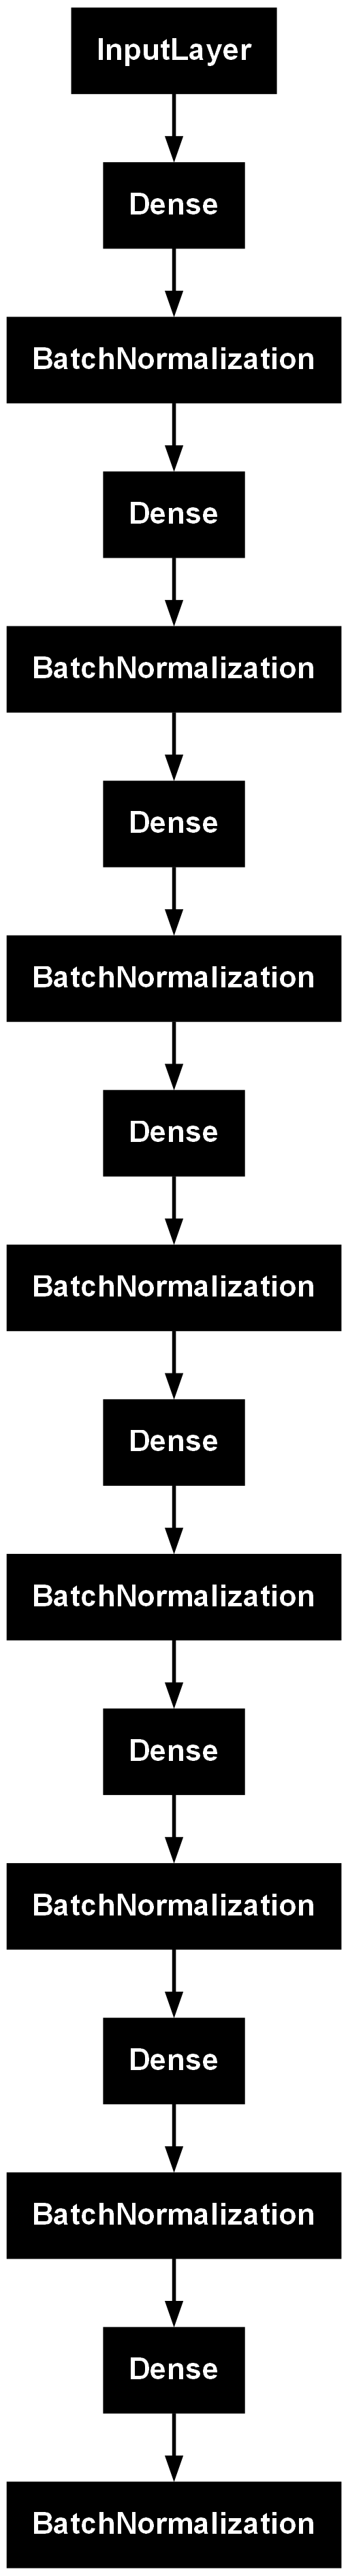

In [5]:
from IPython.display import Image, display
from keras.utils import plot_model

plot_model(ae, show_shapes=False, to_file='unsupervised_ae.png')
display(Image(filename='unsupervised_ae.png'))


### 2.2. Train the model and tune the hyper-parameters

In [6]:
from tensorflow.keras import optimizers

learning_rate = 1E-3 # to be tuned!

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=10000,
    decay_rate=0.01)

optimizer = optimizers.RMSprop(learning_rate=lr_schedule)

ae.compile(loss='mean_squared_error',
           optimizer=optimizer)

In [7]:
history_unsupervised = ae.fit(x_tr, x_tr,
                 batch_size=128,
                 epochs=100,
                 validation_data=(x_val, x_val))

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.9596 - val_loss: 0.1352
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4530 - val_loss: 0.1361
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2431 - val_loss: 0.1238
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1623 - val_loss: 0.1123
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1237 - val_loss: 0.0980
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1024 - val_loss: 0.0885
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0914 - val_loss: 0.0858
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0810 - val_loss: 0.0813
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0744 - val_loss: 0.0701
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0690 - val_loss: 0.0676
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0661 - val_loss: 0.0669
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

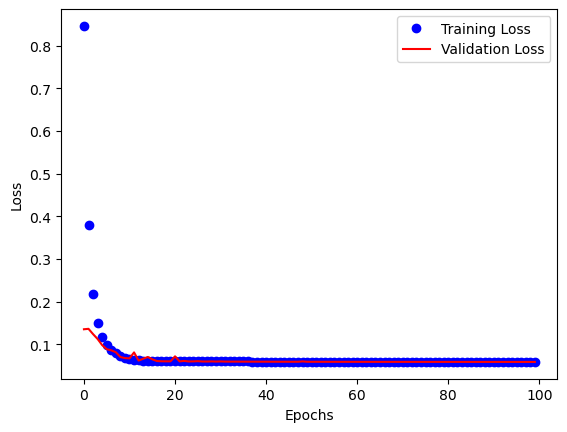

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history_unsupervised.history['loss']
val_loss = history_unsupervised.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 2.3. Visualize the reconstructed test images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


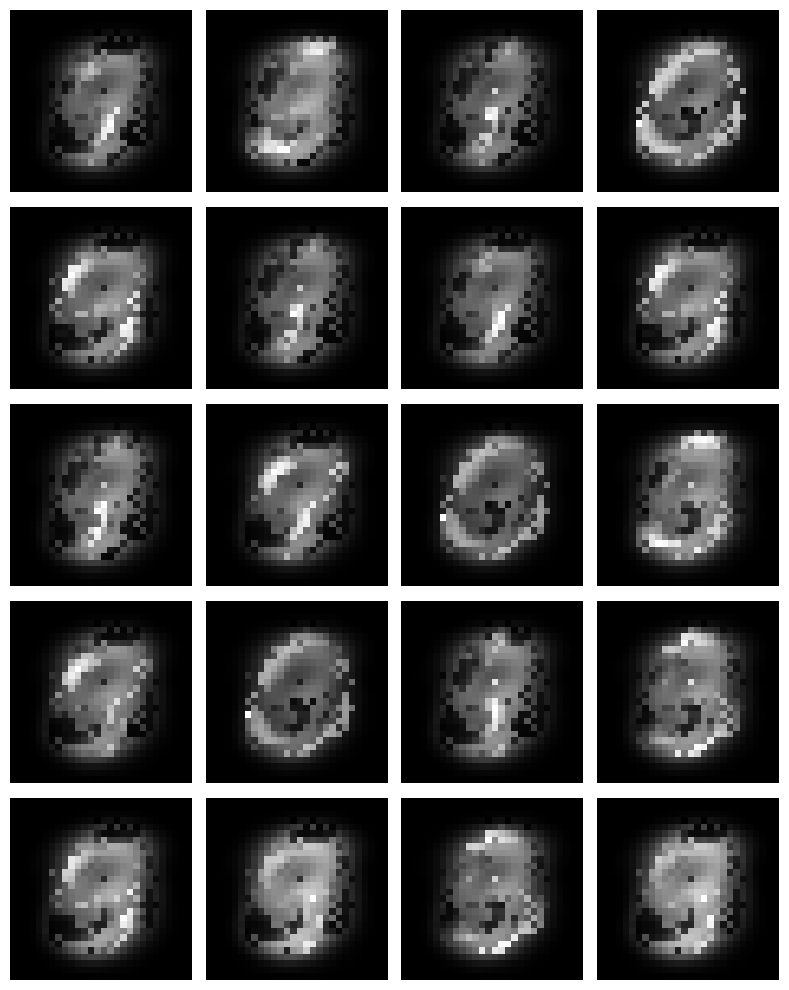

In [9]:
ae_output = ae.predict(x_test).reshape((10000, 28, 28))

ROW = 5
COLUMN = 4

x = ae_output
fname = 'reconstruct_ae.pdf'

fig, axes = plt.subplots(nrows=ROW, ncols=COLUMN, figsize=(8, 10))
for ax, i in zip(axes.flat, np.arange(ROW*COLUMN)):
    image = x[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fname)
plt.show()

### 2.4. Evaluate the model on the test set

In [10]:
loss = ae.evaluate(x_test, x_test)
print('loss = ' + str(loss))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0572
loss = 0.058736804872751236


### 2.5. Visualize the low-dimensional features

In [11]:
# build the encoder network
ae_encoder = models.Model(input_img, bottleneck)
ae_encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            34 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,834 (858.73 KB)

 Trainable params: 219,158 (856.09 KB)

 Non-trainable params: 676 (2.64 KB)

In [12]:
# extract low-dimensional features from the test data
encoded_test = ae_encoder.predict(x_test)
print('Shape of encoded_test: ' + str(encoded_test.shape))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of encoded_test: (10000, 2)


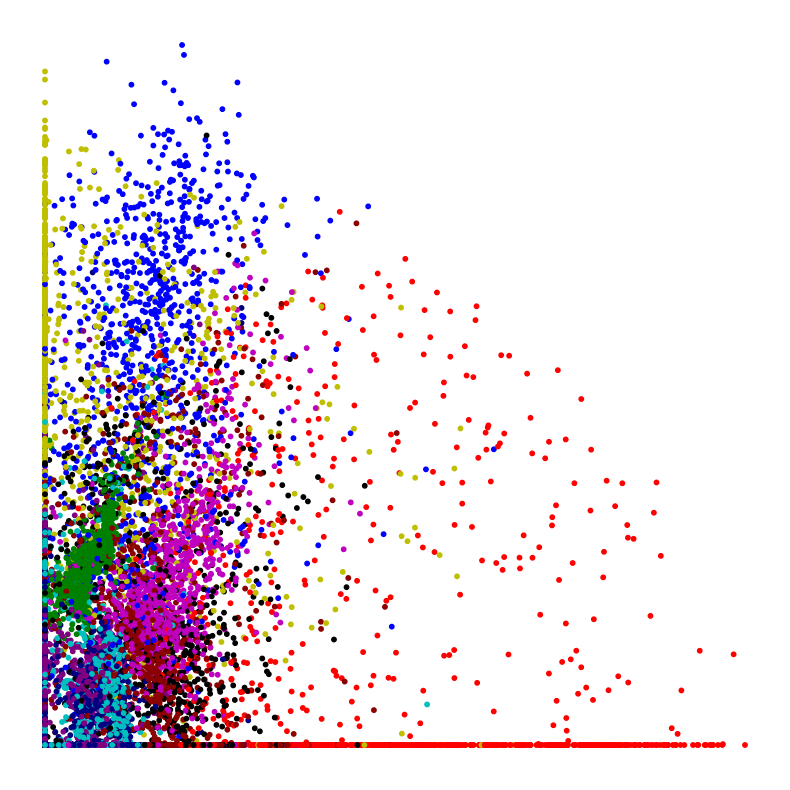

In [13]:
colors = np.array(['r', 'g', 'b', 'm', 'c', 'k', 'y', 'purple', 'darkred', 'navy'])
colors_test = colors[y_test]


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
plt.scatter(encoded_test[:, 0], encoded_test[:, 1], s=10, c=colors_test, edgecolors=colors_test)
plt.axis('off')
plt.tight_layout()
fname = 'ae_code.pdf'
plt.savefig(fname)
plt.show()

#### Remark:

Judging from the visualization, the low-dim features seems not discriminative, as 2D features from different classes are mixed. Let quantitatively find out whether they are discriminative.

## 3. Are the learned low-dim features discriminative?

To find the answer, lets train a classifier on the training set (the extracted 2-dim features) and evaluation on the test set.

In [14]:
# extract the 2D features from the training, validation, and test samples
f_tr = ae_encoder.predict(x_tr)
f_val = ae_encoder.predict(x_val)
f_te = ae_encoder.predict(x_test)

print('Shape of f_tr: ' + str(f_tr.shape))
print('Shape of f_te: ' + str(f_te.shape))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of f_tr: (10000, 2)
Shape of f_te: (10000, 2)


In [15]:
from keras.layers import Dense, Input
from keras import models

input_feat = Input(shape=(2,))

hidden1 = Dense(128, activation='relu')(input_feat)
hidden2 = Dense(128, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)

classifier = models.Model(input_feat, output)

classifier.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,186 (71.04 KB)

 Trainable params: 18,186 (71.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1E-4),
                  metrics=['acc'])

history = classifier.fit(f_tr, y_tr,
                        batch_size=32,
                        epochs=30,
                        validation_data=(f_val, y_val))

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.2149 - loss: 2.1888 - val_acc: 0.3380 - val_loss: 1.8940
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.3452 - loss: 1.8228 - val_acc: 0.3982 - val_loss: 1.6760
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4034 - loss: 1.6343 - val_acc: 0.4265 - val_loss: 1.5687
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4359 - loss: 1.5438 - val_acc: 0.4488 - val_loss: 1.5160
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4669 - loss: 1.5054 - val_acc: 0.4646 - val_loss: 1.4822
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4868 - loss: 1.4585 - val_acc: 0.4736 - val_loss: 1.4592
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4746 - loss: 1.4573 - val_acc: 0.4763 - val_loss: 1.4414
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4869 - loss: 1.4369 - val_acc: 0.4809 - val_loss: 1.4263
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

## 4. Build a supervised autoencoder model

### 4.1. Build the network

In [17]:
from keras.layers import Dense, Input, BatchNormalization
from keras import models

input_img = Input(shape=(784,), name='input_img')

# encoder network

encode1 = Dense(256, activation='relu', name='encode1')(input_img)
encode1 = BatchNormalization()(encode1)
encode2 = Dense(128, activation='relu', name='encode2')(encode1)
encode2 = BatchNormalization()(encode2)
encode3 = Dense(32, activation='relu', name='encode3')(encode2)
encode3 = BatchNormalization()(encode3)

# The width of the bottleneck layer must be exactly 2.

bottleneck = Dense(2, activation='relu',name='bottleneck')(encode3)
bottleneck = BatchNormalization()(bottleneck)

# decoder network
decode1 = Dense(32,activation='relu', name='decode1')(bottleneck)
decode1 = BatchNormalization()(decode1)
decode2 = Dense(128,activation='relu', name='decode2')(decode1)
decode2 = BatchNormalization()(decode2)
decode3 = Dense(256,activation='relu', name='decode3')(decode2)
decode3 = BatchNormalization()(decode3)
decode4 = Dense(784, activation='relu',name='decode4')(decode3)


# build a classifier upon the bottleneck layer
classifier1 = Dense(256,activation='relu',name='classifier1')(bottleneck)
classifier1 = BatchNormalization()(classifier1)
classifier2 = Dense(128,activation='relu',name='classifier2')(classifier1)
classifier2 = BatchNormalization()(classifier2)
classifier3 = Dense(10,activation='softmax',name='classifier3')(classifier2)

In [18]:
# connect the input and the two outputs
sae = models.Model(input_img, [decode4, classifier3])

sae.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encode1 (Dense)     │ (None, 256)       │    200,960 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ encode1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encode2 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ encode2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encode3 (Dense)     │ (None, 32)        │      4,128 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ encode3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck (Dense)  │ (None, 2)         │         66 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2)         │          8 │ bottleneck[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decode1 (Dense)     │ (None, 32)        │         96 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ decode1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decode2 (Dense)     │ (None, 128)       │      4,224 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier1 (Dense) │ (None, 256)       │        768 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ decode2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ classifier1[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decode3 (Dense)     │ (None, 256)       │     33,024 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier2 (Dense) │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ decode3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ classifier2[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decode4 (Dense)     │ (None, 784)       │    201,488 │ batch_normalizat

 Total params: 516,708 (1.97 MB)

 Trainable params: 514,272 (1.96 MB)

 Non-trainable params: 2,436 (9.52 KB)

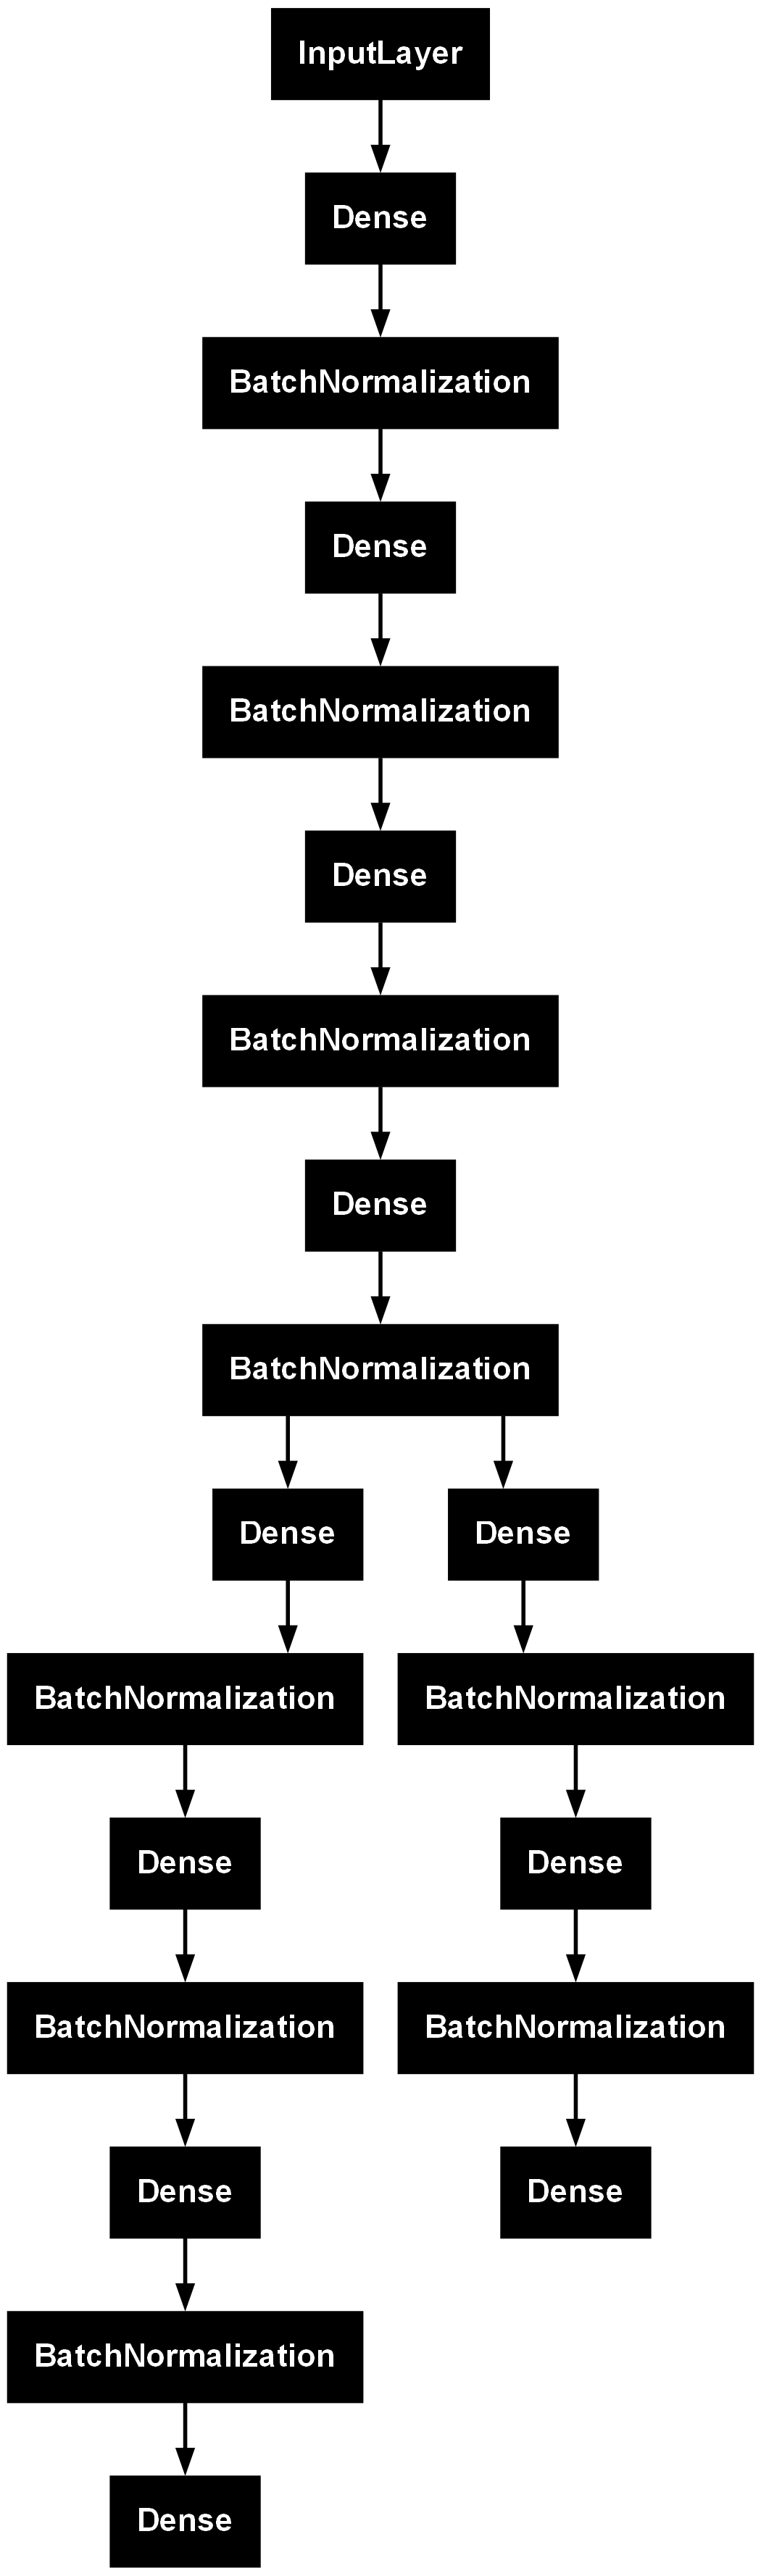

In [19]:
from keras.utils import plot_model
from IPython.display import Image, display

plot_model(sae, show_shapes=False, to_file='supervised_ae.png')
display(Image(filename='supervised_ae.png'))


### 4.2. Train the new model and tune the hyper-parameters

The new model has multiple output. Thus we specify **multiple** loss functions and their weights.

In [20]:
from tensorflow.keras import optimizers

sae.compile(loss=['mean_squared_error', 'categorical_crossentropy'],
            loss_weights=[1, 0.5], # to be tuned
            optimizer=optimizers.RMSprop(learning_rate=1E-3))

history = sae.fit(x_tr, [x_tr, y_tr],
                  batch_size=32,
                  epochs=100,
                  validation_data=(x_val, [x_val, y_val]))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - classifier3_loss: 1.6622 - decode4_loss: 0.0934 - loss: 0.9245 - val_classifier3_loss: 1.4228 - val_decode4_loss: 0.0710 - val_loss: 0.7824
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - classifier3_loss: 0.7822 - decode4_loss: 0.0641 - loss: 0.4552 - val_classifier3_loss: 0.4865 - val_decode4_loss: 0.0599 - val_loss: 0.3030
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - classifier3_loss: 0.5870 - decode4_loss: 0.0599 - loss: 0.3534 - val_classifier3_loss: 0.4385 - val_decode4_loss: 0.0581 - val_loss: 0.2772
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classifier3_loss: 0.4902 - decode4_loss: 0.0581 - loss: 0.3032 - val_classifier3_loss: 0.3929 - val_decode4_loss: 0.0566 - val_loss: 0.2530
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classifier3_loss: 0.4132 - decode4_loss: 0.0570 - loss: 0.2636 - val_classifier3_loss: 0.3815 - val_decode4_loss: 0.0575 - val_loss: 0.2483
Epoch 6/100
313/313 ━━

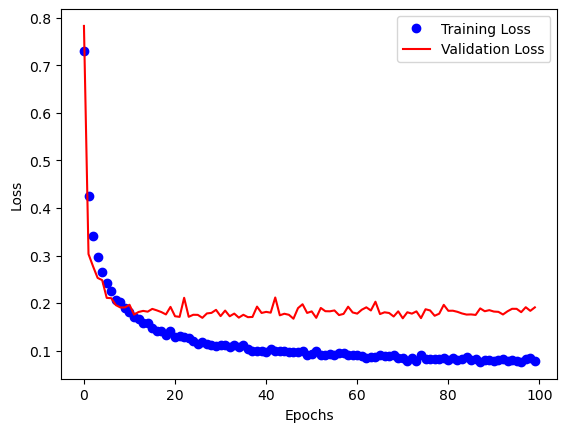

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training loss and validation loss are going down eventually.

### 4.3. Visualize the reconstructed test images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


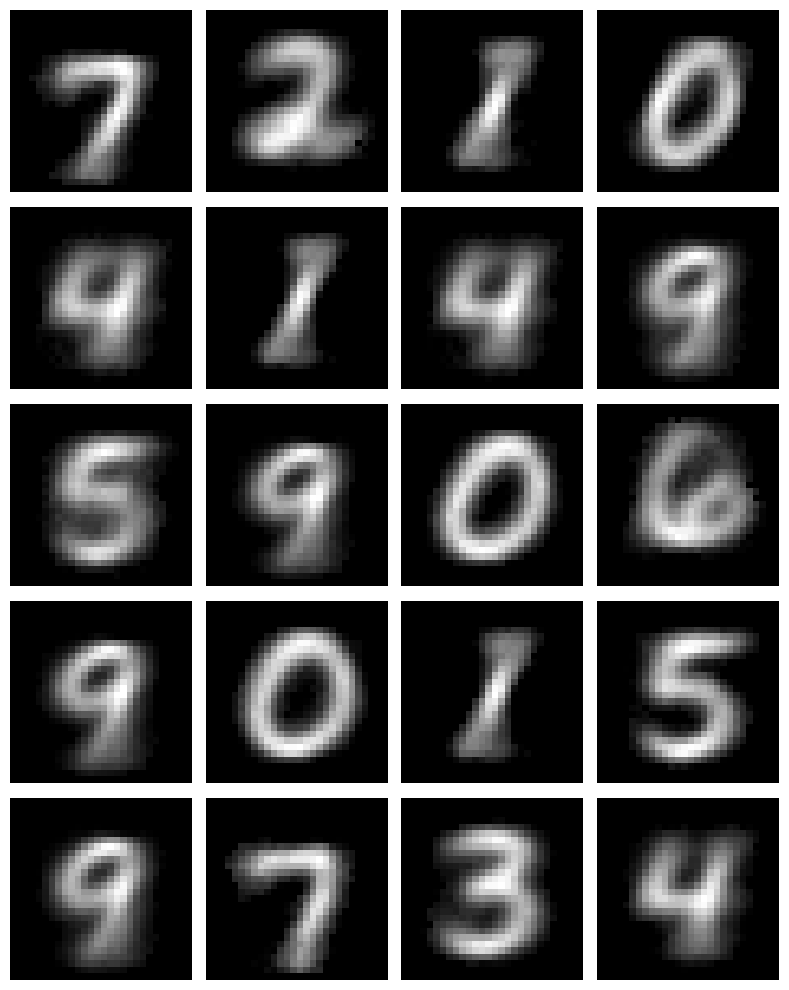

In [22]:
sae_output = sae.predict(x_test)[0].reshape((10000, 28, 28))

ROW = 5
COLUMN = 4

x = sae_output
fname = 'reconstruct_sae.pdf'

fig, axes = plt.subplots(nrows=ROW, ncols=COLUMN, figsize=(8, 10))
for ax, i in zip(axes.flat, np.arange(ROW*COLUMN)):
    image = x[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fname)
plt.show()

### 4.4. Visualize the low-dimensional features

In [23]:
# build the encoder model
sae_encoder = models.Model(input_img, bottleneck)
sae_encoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encode3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,722 (936.41 KB)

 Trainable params: 238,886 (933.15 KB)

 Non-trainable params: 836 (3.27 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of encoded_test: (10000, 2)


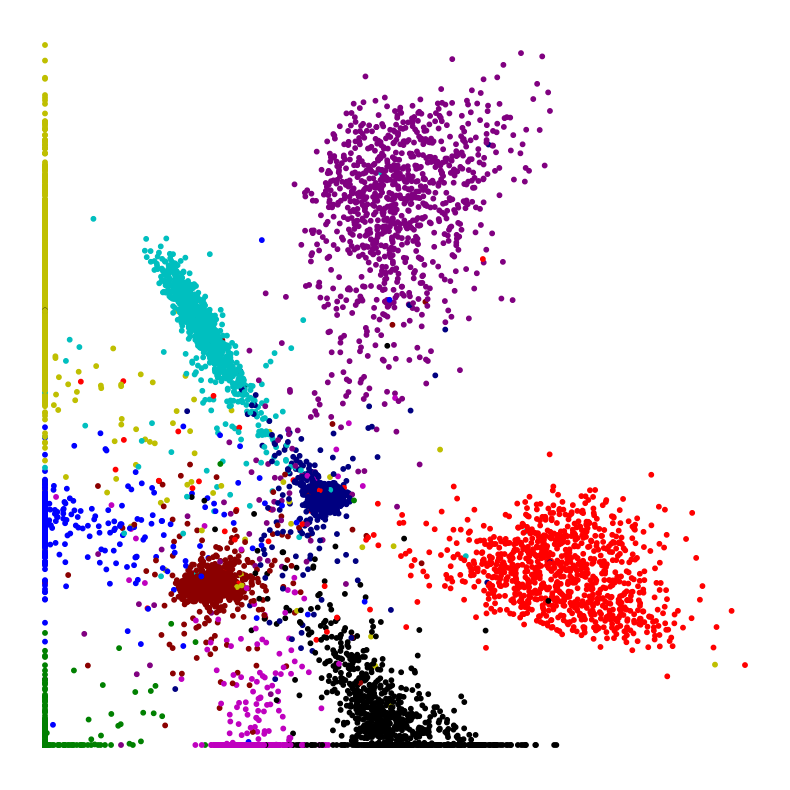

In [24]:
# extract test features
encoded_test = sae_encoder.predict(x_test)
print('Shape of encoded_test: ' + str(encoded_test.shape))

colors = np.array(['r', 'g', 'b', 'm', 'c', 'k', 'y', 'purple', 'darkred', 'navy'])
colors_test = colors[y_test]


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
plt.scatter(encoded_test[:, 0], encoded_test[:, 1], s=10, c=colors_test, edgecolors=colors_test)
plt.axis('off')
plt.tight_layout()
fname = 'sae_code.pdf'
plt.savefig(fname)
plt.show()

### 4.5. Are the learned low-dim features discriminative?

To find the answer, lets train a classifier on the training set (the extracted 2-dim features) and evaluation on the validation and test set.

In [25]:
# extract 2D features from the training, validation, and test samples
f_tr = sae_encoder.predict(x_tr)
f_val = sae_encoder.predict(x_val)
f_te = sae_encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
# build a classifier which takes the 2D features as input
from keras.layers import *
from keras import models

input_feat = Input(shape=(2,))

hidden1 = Dense(128, activation='relu')(input_feat)
hidden2 = Dense(128, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)

classifier = models.Model(input_feat, output)

classifier.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,186 (71.04 KB)

 Trainable params: 18,186 (71.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1E-4),
                  metrics=['acc'])

history = classifier.fit(f_tr, y_tr,
                        batch_size=32,
                        epochs=30,
                        validation_data=(f_val, y_val))

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.4335 - loss: 2.0159 - val_acc: 0.6549 - val_loss: 1.3841
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7306 - loss: 1.1417 - val_acc: 0.8367 - val_loss: 0.7831
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9096 - loss: 0.5953 - val_acc: 0.9443 - val_loss: 0.4673
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9947 - loss: 0.2852 - val_acc: 0.9478 - val_loss: 0.3172
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9945 - loss: 0.1394 - val_acc: 0.9495 - val_loss: 0.2679
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9959 - loss: 0.0669 - val_acc: 0.9504 - val_loss: 0.2642
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9953 - loss: 0.0468 - val_acc: 0.9504 - val_loss: 0.2721
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9961 - loss: 0.0370 - val_acc: 0.9511 - val_loss: 0.2815
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

#### Remark:

The validation accuracy must be above 90%. It means the low-dim features learned by the supervised autoencoder are very effective.

In [28]:
loss = classifier.evaluate(f_te, y_test_vec)

print('Accuracy:', loss[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9429 - loss: 0.4476
Accuracy: 0.9528999924659729


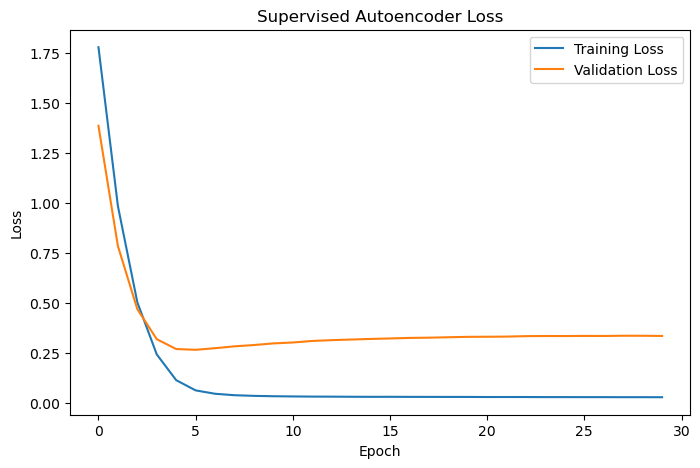

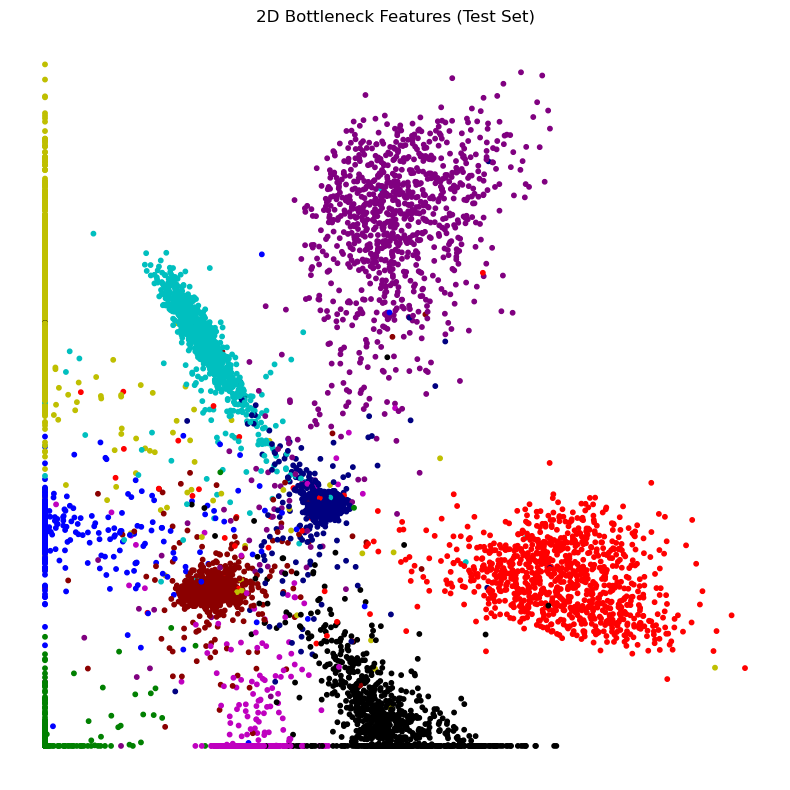

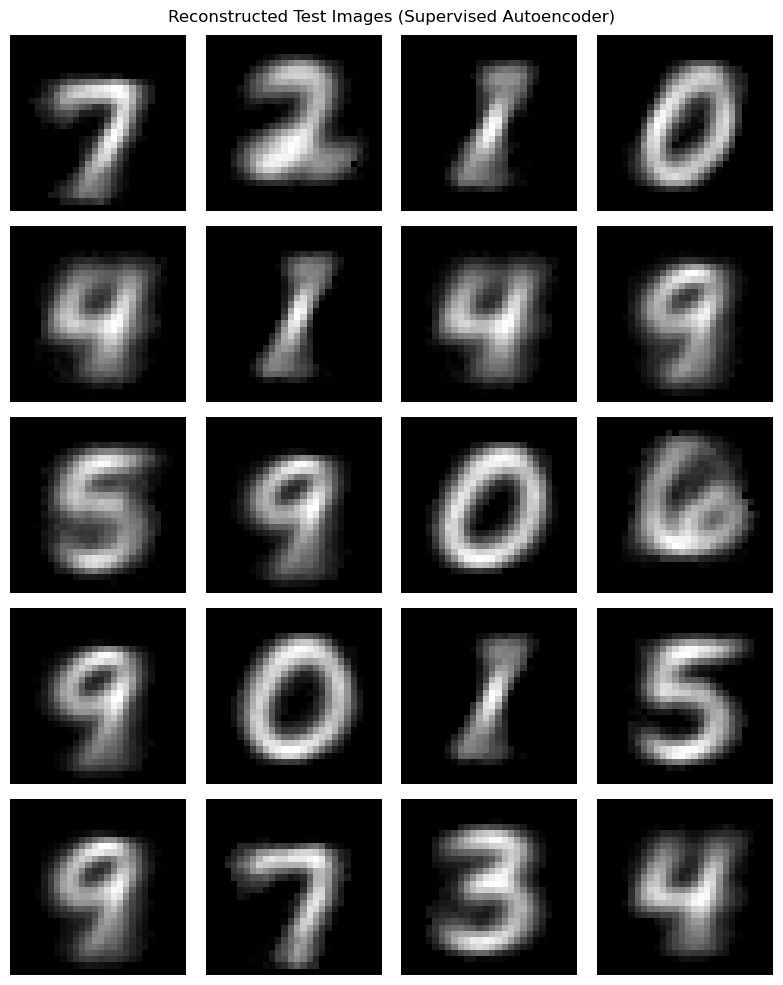

In [29]:
import matplotlib.pyplot as plt

# 1. Plot the training and validation loss for the supervised autoencoder
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Supervised Autoencoder Loss')
plt.legend()
plt.show()

# 2. Visualize the low-dimensional features (2D bottleneck) on the test set
plt.figure(figsize=(8, 8))
plt.scatter(encoded_test[:, 0], encoded_test[:, 1], s=10, c=colors_test, edgecolors=colors_test)
plt.title('2D Bottleneck Features (Test Set)')
plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Show a grid of reconstructed test images from the supervised autoencoder
fig, axes = plt.subplots(nrows=ROW, ncols=COLUMN, figsize=(8, 10))
for ax, i in zip(axes.flat, range(ROW * COLUMN)):
    ax.imshow(sae_output[i], cmap='gray')
    ax.axis('off')
plt.suptitle('Reconstructed Test Images (Supervised Autoencoder)')
plt.tight_layout()
plt.show()